**Set environment**

In [12]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(source("../config/config_func.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data**

In [2]:
fdiry = file.path(FD_RES, "source")
fglob = file.path(fdiry, "hic_intact*")
Sys.glob(fglob)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/source/hic_intact_K562_deep"       
[2] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/source/hic_intact_K562_ENCSR479XDG"

In [3]:
FOLDER="hic_intact_K562_deep"
fdiry = file.path(FD_RES, "source", FOLDER)
for (fname in dir(fdiry)) {print(fname)}

[1] "inter.hic"
[1] "localizedList_primary_10.bedpe"


## Loop

In [4]:
fdiry = file.path(FD_RES, "source", FOLDER)
fname = "localizedList_primary_10.bedpe"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, col_names = FALSE, comment = "#")

dat_hic_loop = dat
print(dim(dat))
head(dat)

Rows: 128714 Columns: 46
── Column specification ──────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): X1, X4, X7, X8, X9, X10, X11
dbl (39): X2, X3, X5, X6, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 128714     46


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10,72223000,72224000,chr10,72328000,72329000,.,.,.,.,⋯,72223010,72328480,28,0.006703467,3.735599,910,1320,180,480,0
chr10,64041000,64042000,chr10,67697000,67698000,.,.,.,.,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr10,78302000,78304000,chr10,79194000,79196000,.,.,.,.,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr10,13372000,13373000,chr10,13404000,13405000,.,.,.,.,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr10,132388000,132389000,chr10,132637000,132638000,.,.,.,.,⋯,132388100,132637710,6,0.029244716,2.577377,260,170,170,190,0
chr10,114550000,114552000,chr10,114876000,114878000,.,.,.,.,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Arrange

**Loop distance and size**

In [5]:
dat = dat_hic_loop
dat = dat[,1:6]

cnames = c("Chrom_A", "Start_A", "End_A", "Chrom_B", "Start_B", "End_B")
colnames(dat) = cnames

dat = dat %>%
    dplyr::mutate(
        Loop_A    = paste0(Chrom_A, ":", Start_A, "-", End_A),
        Loop_B    = paste0(Chrom_B, ":", Start_B, "-", End_B),
        Length_A  = End_A - Start_A,
        Length_B  = End_B - Start_B,
        Distance = abs((Start_A + End_A) / 2 - (Start_B + End_B) / 2)
    ) %>%
    dplyr::distinct()

dat_hic_loop_info = dat
print(dim(dat))
head(dat)

[1] 128714     11


Chrom_A,Start_A,End_A,Chrom_B,Start_B,End_B,Loop_A,Loop_B,Length_A,Length_B,Distance
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr10,72223000,72224000,chr10,72328000,72329000,chr10:72223000-72224000,chr10:72328000-72329000,1000,1000,105000
chr10,64041000,64042000,chr10,67697000,67698000,chr10:64041000-64042000,chr10:67697000-67698000,1000,1000,3656000
chr10,78302000,78304000,chr10,79194000,79196000,chr10:78302000-78304000,chr10:79194000-79196000,2000,2000,892000
chr10,13372000,13373000,chr10,13404000,13405000,chr10:13372000-13373000,chr10:13404000-13405000,1000,1000,32000
chr10,132388000,132389000,chr10,132637000,132638000,chr10:132388000-132389000,chr10:132637000-132638000,1000,1000,249000
chr10,114550000,114552000,chr10,114876000,114878000,chr10:114550000-114552000,chr10:114876000-114878000,2000,2000,326000


In [13]:
dat = dat_hic_loop_info
dat = dat %>% dplyr::mutate(Distance_Category = fun_cut(Distance))
lst = split(dat, dat$Distance_Category)

lst_dat_hic_loop_info = lst
print(names(lst))
head(dat)

[1] "Q1" "Q2" "Q3" "Q4"


Chrom_A,Start_A,End_A,Chrom_B,Start_B,End_B,Loop_A,Loop_B,Length_A,Length_B,Distance,Distance_Category
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
chr10,72223000,72224000,chr10,72328000,72329000,chr10:72223000-72224000,chr10:72328000-72329000,1000,1000,105000,Q2
chr10,64041000,64042000,chr10,67697000,67698000,chr10:64041000-64042000,chr10:67697000-67698000,1000,1000,3656000,Q4
chr10,78302000,78304000,chr10,79194000,79196000,chr10:78302000-78304000,chr10:79194000-79196000,2000,2000,892000,Q4
chr10,13372000,13373000,chr10,13404000,13405000,chr10:13372000-13373000,chr10:13404000-13405000,1000,1000,32000,Q1
chr10,132388000,132389000,chr10,132637000,132638000,chr10:132388000-132389000,chr10:132637000-132638000,1000,1000,249000,Q3
chr10,114550000,114552000,chr10,114876000,114878000,chr10:114550000-114552000,chr10:114876000-114878000,2000,2000,326000,Q3


## Summary: description

**Size = 1kb-10kb**

In [6]:
table(dat$Length_A, dat$Length_B)

       
         1000  2000  5000 10000
  1000  80948     0     0     0
  2000      0 22895     0     0
  5000      0     0 19294     0
  10000     0     0     0  5577

In [7]:
table(dat$Length_A)


 1000  2000  5000 10000 
80948 22895 19294  5577 

In [8]:
table(dat$Chrom_A, dat$Chrom_B)

       
         chr1 chr10 chr11 chr12 chr13 chr14 chr16 chr17 chr18 chr19  chr2 chr20
  chr1  15268     0     0     0     0     0     0     0     0     0     0     0
  chr10     0  6065     0     0     0     0     0     0     0     0     0     0
  chr11     0     0  7460     0     0     0     0     0     0     0     0     0
  chr12     0     0     0  6835     0     0     0     0     0     0     0     0
  chr13     0     0     0     0  2435     0     0     0     0     0     0     0
  chr14     0     0     0     0     0  3653     0     0     0     0     0     0
  chr16     0     0     0     0     0     0  4508     0     0     0     0     0
  chr17     0     0     0     0     0     0     0  5642     0     0     0     0
  chr18     0     0     0     0     0     0     0     0  2344     0     0     0
  chr19     0     0     0     0     0     0     0     0     0  6292     0     0
  chr2      0     0     0     0     0     0     0     0     0     0 10114     0
  chr20     0     0     0     0 

**Distance: 8kb-9Mb**

In [14]:
lst = lst_dat_hic_loop_info

cat("======================\n")
res = lapply(lst, nrow)
print(res)

cat("======================\n")
res = lapply(lst, function(dat){range(dat$Distance)})
print(res)

cat("======================\n")
res = summary(dat$Distance)
print(res)

cat("======================\n")
res = summary(dat$Distance)/1000
print(res)

$Q1
[1] 32634

$Q2
[1] 31734

$Q3
[1] 32241

$Q4
[1] 32105

$Q1
[1]  8000 68000

$Q2
[1]  69000 171000

$Q3
[1] 172000 414000

$Q4
[1]  415000 9640000

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8000   68000  171000  381303  414000 9640000 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    8.0    68.0   171.0   381.3   414.0  9640.0 


## Summary: visualization

Warning message:
“Removed 1729 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


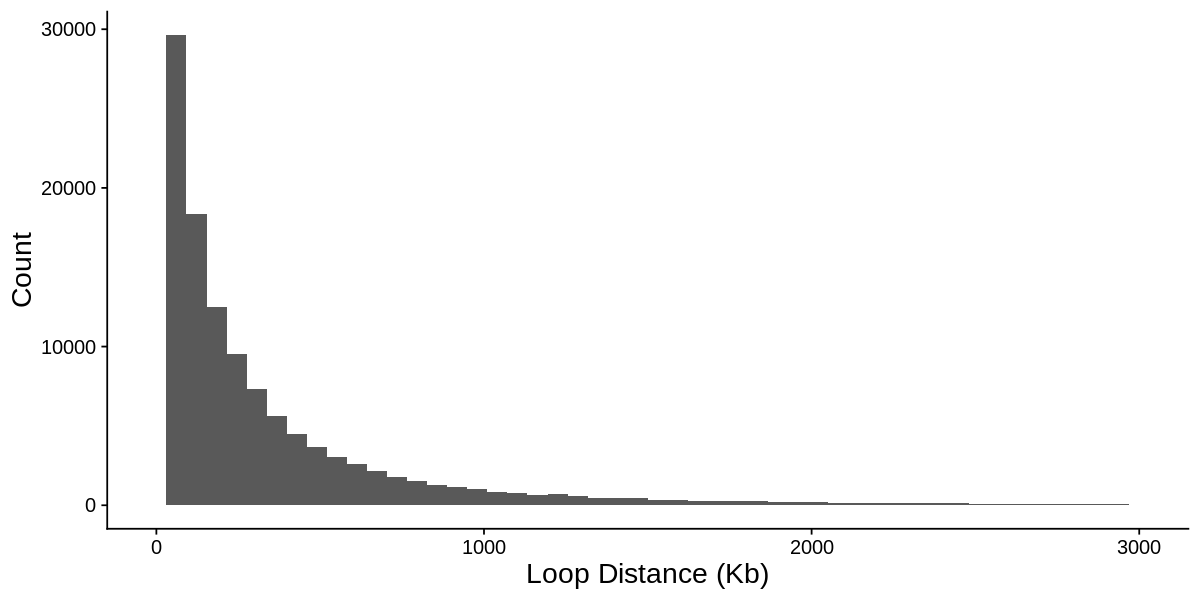

In [31]:
theme_txt = theme(
    axis.title = element_text(size=17),
    axis.text  = element_text(size=12)
)
gpt = ggplot(dat, aes(x=Distance / 1000)) + 
    geom_histogram(bins = 50) + 
    labs(x="Loop Distance (Kb)", y="Count") +
    xlim(0, 3000) +
    theme_cowplot() +
    theme_txt

options(repr.plot.height = 5, repr.plot.width = 10)
print(gpt)

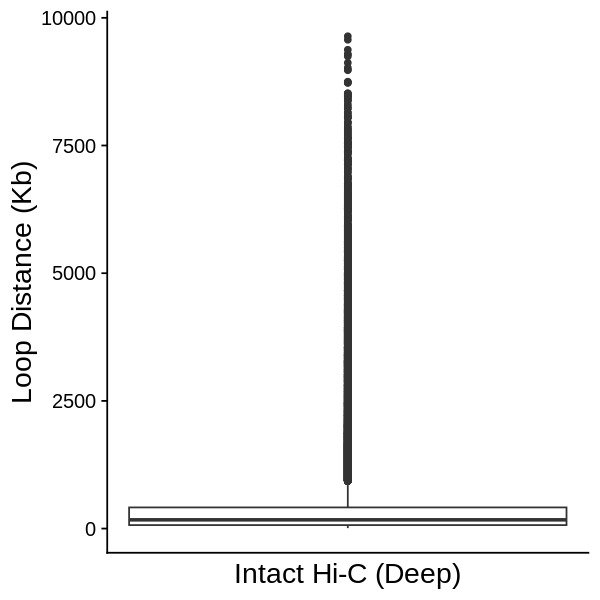

In [32]:
theme_txt = theme(
    axis.title   = element_text(size=17),
    axis.text.y  = element_text(size=12),
    axis.text.x  = element_blank(),
    axis.ticks.x = element_blank(),
)
gpt = ggplot(dat, aes(y=Distance / 1000)) + 
    geom_boxplot() + 
    labs(y="Loop Distance (Kb)", x="Intact Hi-C (Deep)") +
    theme_cowplot() +
    theme_txt

options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)